In [1]:
################################
# Scientific imports
###
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

###
# General imports
###
import csv, math, io, os, os.path, sys, random, time
import pandas as pd
import seaborn as sb
from tqdm.notebook import tqdm, trange

###
# SciKitLearn Imports
###
import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from IPython.display import display

###
# MatPlotLib Settings
###

plt.rcParams["figure.figsize"] = (20,9)
sb.set()

In [2]:
# Load the Data files
fitsarr = np.load("fitslist.npy")
fluxarr = np.load("fluxlist.npy")
planetarr = np.load("planetlist.npy")
isplanetarr = np.load("isplanetlist.npy")

### If I'm going to be using K-Means Clustering, my data needs to be clusterable, and ideally should only really have 2 clusters (Planet-NO and Planet-YES)

In [5]:
# Sort data into Test and Train
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(fluxarr, isplanetarr, random_state=42) # 42 because it is the answer to Life, the Universe, and Everything.

In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

kmeans = KMeans(n_clusters=2)   # 2 clusters

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(Xtrain)
kmeans.cluster_centers_.shape

(2, 20340)

(array([[2., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        [2., 0., 0., ..., 0., 0., 0.]]),
 array([       0.        ,  1141291.03333333,  2282582.06666667,
         3423873.1       ,  4565164.13333333,  5706455.16666667,
         6847746.2       ,  7989037.23333333,  9130328.26666667,
        10271619.3       , 11412910.33333333]),
 <a list of 20340 BarContainer objects>)

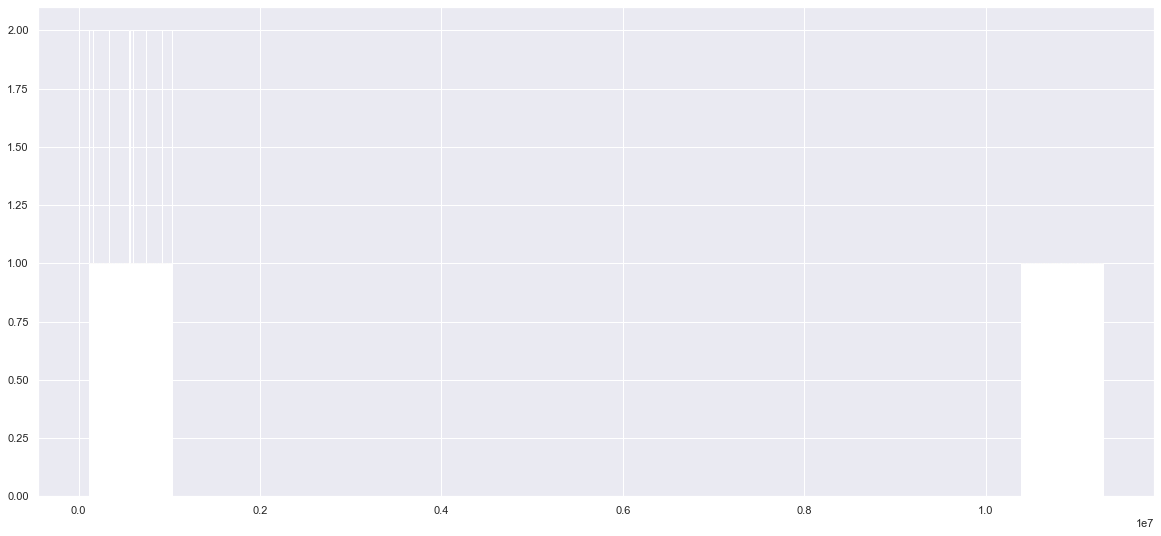

In [61]:
clusters.shape
plt.hist(kmeans.cluster_centers_, )

ValueError: cannot reshape array of size 40680 into shape (12000,20340)

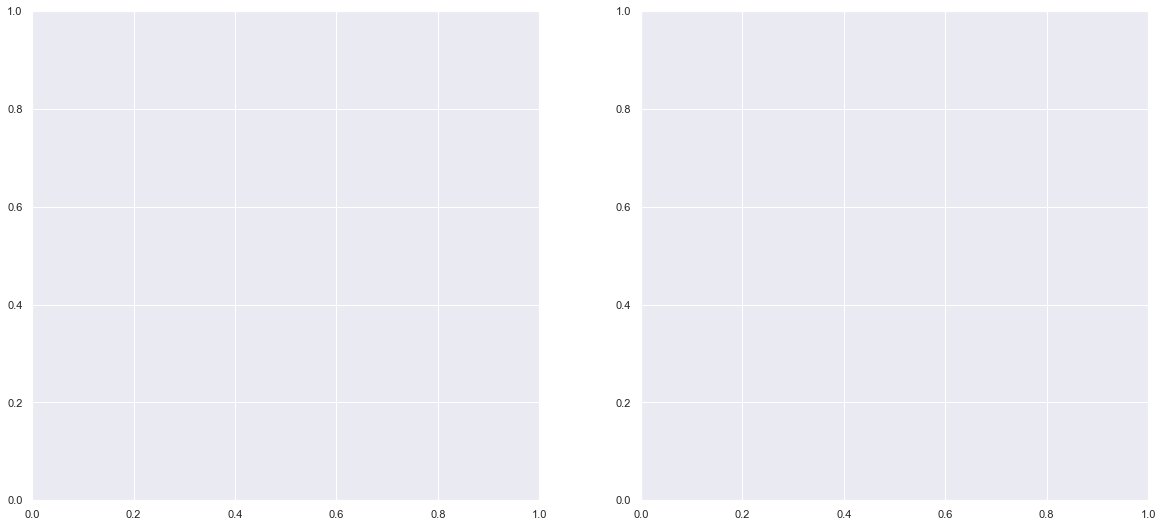

In [37]:
fig, ax = plt.subplots(1, 2)
#centers = kmeans.cluster_centers_.reshape(2, 8, 8)

centers = kmeans.cluster_centers_.reshape(12000,20340)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [41]:
kmeans.fit(Xtrain,ytrain)
y_kmeans = kmeans.predict(Xtrain)

In [43]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

(array([11979.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,    21.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

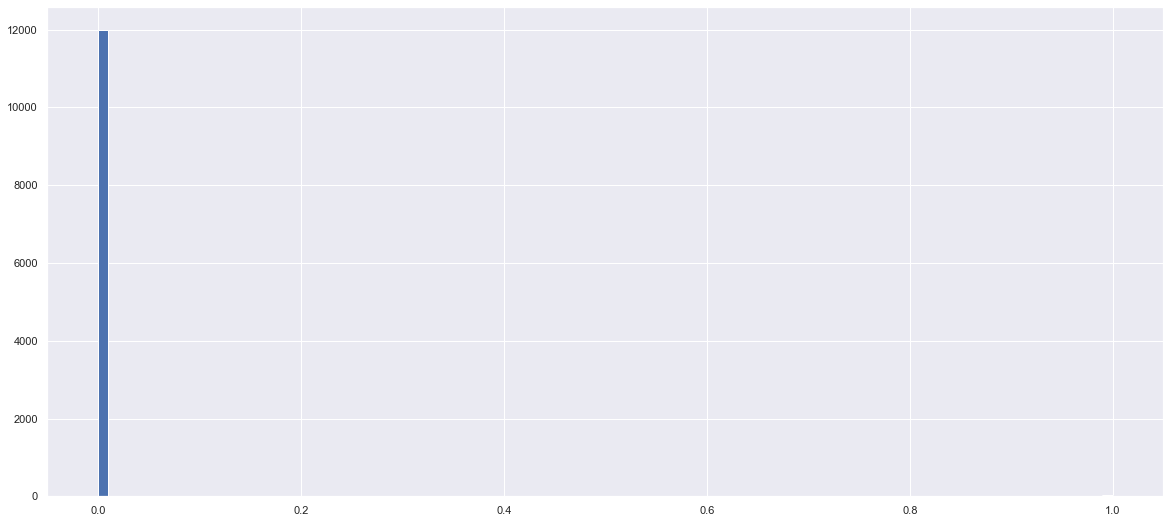

In [49]:
plt.hist(y_kmeans,bins=100)

In [55]:
# [f(x) if condition else g(x) for x in sequence]
ytestbin = [1 if x==True else 0 for x in ytest]

(array([3257.,  743.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

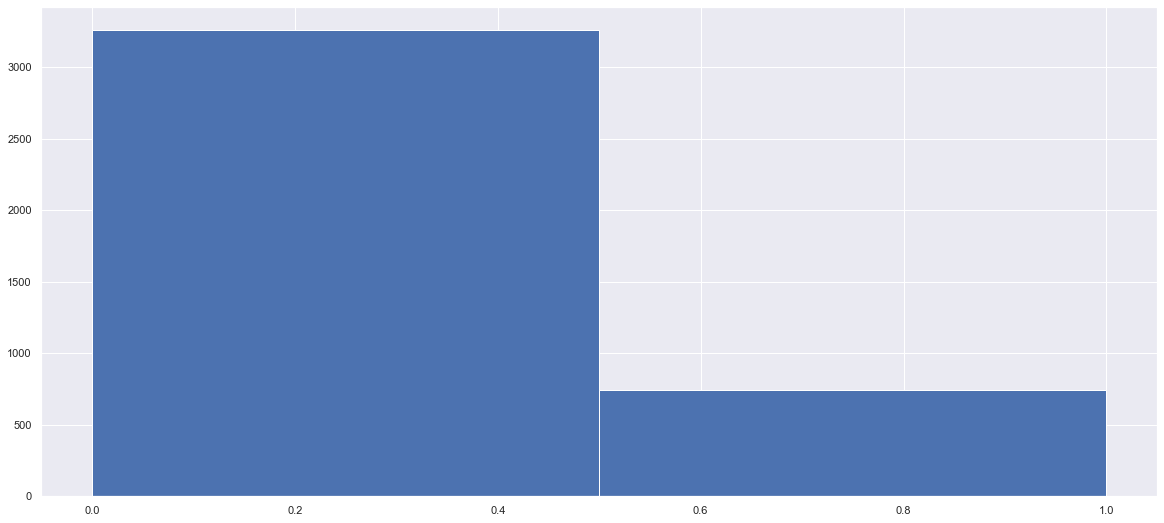

In [59]:
plt.hist(ytestbin, bins=2)